# **TS0-Noelia Ferrari**

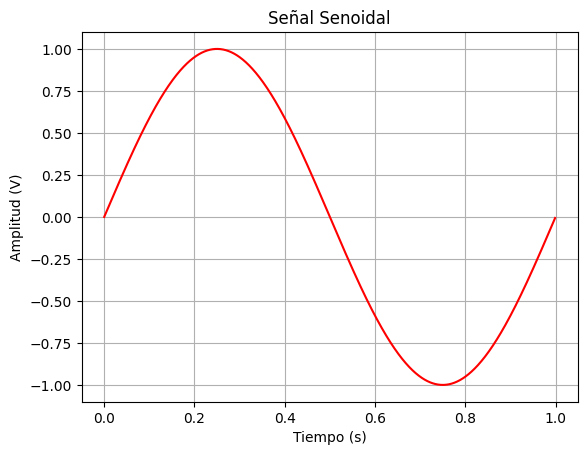

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def mi_funcion_sen(vmax=1, dc=0, ff=1, ph=0, nn=1000, fs=1000.0):
    '''
    Esta funcion genera una señal senoidal.
    descripcion de los parametros:
    vmax:amplitud max de la senoidal [Volts]
    dc:valor medio [Volts]
    ff:frecuencia [Hz]
    ph:fase en [rad]
    nn:cantidad de muestras
    fs:frecuencia de muestreo [Hz]
    '''
    Ts = 1 / fs  # Período de muestreo
    tt = np.linspace(0, (nn - 1) * Ts, nn)  # Vector de tiempos
    xx = vmax * np.sin(2 * np.pi * ff * tt + ph) + dc  
    
    return tt, xx


tt, xx = mi_funcion_sen(vmax=1, dc=0, ff=1, ph=0, nn=1000, fs=1000)

plt.plot(tt, xx, color='red')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.title("Señal Senoidal")
plt.grid()
plt.show()


## **BONUS**

### ONDA 500Hz

<function matplotlib.pyplot.show(close=None, block=None)>

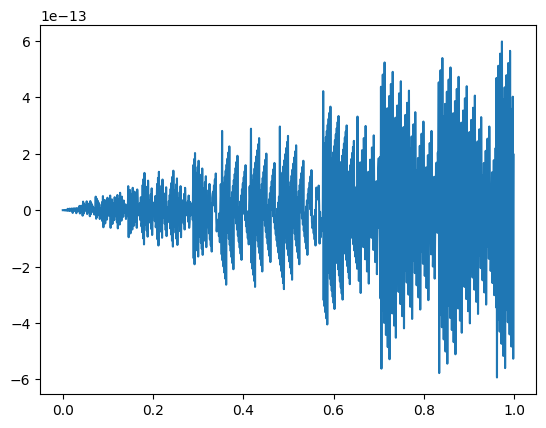

In [6]:
fs=1000.0 #frec muestreo
N=1000 #cantidad de muestras
Ts=1/fs
f0=500 #Hz
t=np.linspace(0,(N-1)*Ts,N)
y=np.sin(2*np.pi*f0*t)

plt.figure(1)
plt.plot(t,y)
plt.show

La señal que estoy generando tiene una **f0=500Hz**, mi frecuencia de muestreo es de fs=1000 Hz 
que es igual a la de Nyquist para una señal de 500Hz. El teorema de Nyquistn dice que para 
que una señal de frecuencia f0 sea muestreada de manera precisa sin aliasing, la frecuencia 
de muestreo debe ser al menos el doble de la frecuencia máxima de la señal (frecuencia de Nyquist).
En este caso f0 x 2= 1000Hz=Frecuencia Nyquist, es igual a la de muestreo por lo tanto
la separación entre los puntos de muestreo es grande, lo que significa que la señal 
muestreada tendrá pocos puntos de muestreo por ciclo. Esto puede afectar la reconstrucción precisa de la señal, 
porque no tienes suficiente densidad de puntos para capturar los detalles de la onda senoidal de manera precisa.

### ONDA 999Hz

<function matplotlib.pyplot.show(close=None, block=None)>

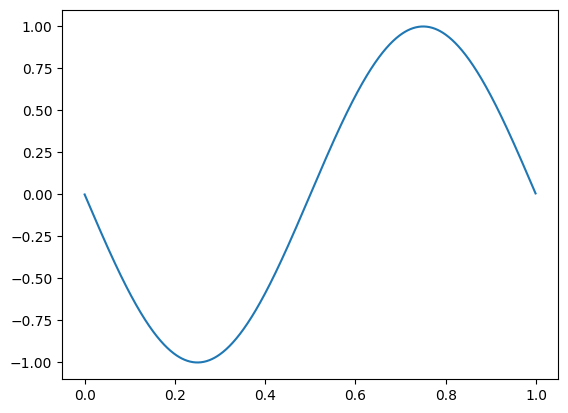

In [7]:
f0=999 #Hz
t=np.linspace(0,(N-1)*Ts,N)
y=np.sin(2*np.pi*f0*t)

plt.figure(2)
plt.plot(t,y)
plt.show

Dado que  la f0 y fs están tan cerca, las muestras caen en los mismos puntos.

### ONDA 1001Hz

<function matplotlib.pyplot.show(close=None, block=None)>

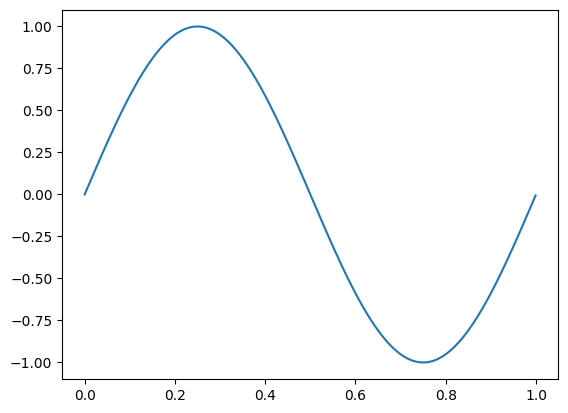

In [8]:
f0=1001 #Hz
t=np.linspace(0,(N-1)*Ts,N)
y=np.sin(2*np.pi*f0*t)

plt.figure(3)
plt.plot(t,y)
plt.show


Ahora, con f0=1001Hz y fs=1000 ocurre un aliasing.

La **frecuencia de aliasing** $fa$ es la frecuencia aparente de la señal muestreada cuando $f0$  excede el limite de Nyquist $\frac{fs}{2}$.

Se define como:
                                                    $ f_a = |f_0 - k f_s|, \; k \in \mathbb{Z} $

$k$ es un numero entero que representa cuantos ciclos de la frecuencia de muestreo $fs$ deben restarse de la frecuencia original $f0$ para que la frecuencia observada se pliegue dentro del rango de frecuencias permitidas, $[0,\frac{fs}{2}]$.
Después del muestreo, la frecuencia observada es $fa$, ya que las frecuencias mayores a $\frac{fs}{2}$ se pliegan debido al aliasing.

Casos analizados:   \begin{align}
f_0 &= 500\,\text{Hz} \rightarrow f_a = 500\,\text{Hz} \quad (\text{caso límite}) \\
f_0 &= 999\,\text{Hz} \rightarrow f_a = 1\,\text{Hz} \\
f_0 &= 1001\,\text{Hz} \rightarrow f_a = 1\,\text{Hz} \\
f_0 &= 2001\,\text{Hz} \rightarrow f_a = 1\,\text{Hz}
\end{align}


Esto explicaria porqué luego del muestreo las señal de $f0=1001Hz$ se ve igual a $f0=2001Hz$




### ONDA 2001Hz

<function matplotlib.pyplot.show(close=None, block=None)>

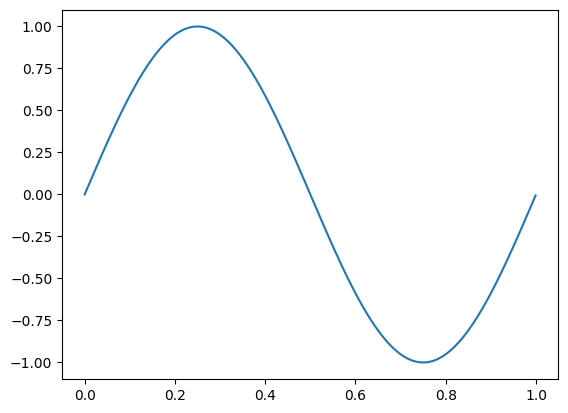

In [9]:
f0=2001 #Hz
t=np.linspace(0,(N-1)*Ts,N)
y=np.sin(2*np.pi*f0*t)

plt.figure(4)
plt.plot(t,y)
plt.show

## **IMPLEMENTACIÓN DE OTRA SEÑAL**

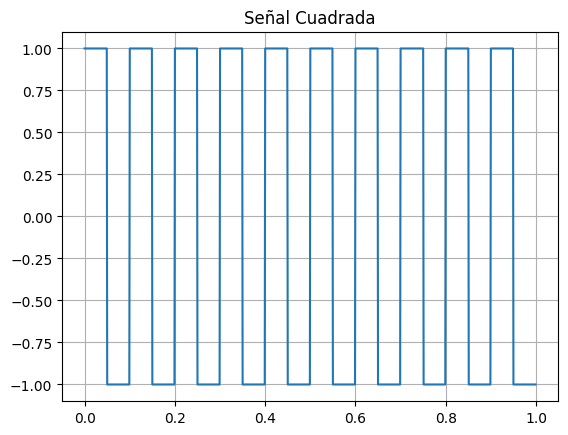

In [11]:
from scipy.signal import square

def mi_funcion_cuadrada(vmax=1, dc=0, ff=1, nn=1000, fs=1000.0, duty=0.5):
    tt = np.linspace(0, (nn - 1) / fs, nn)
    xx = vmax * square(2 * np.pi * ff * tt, duty) + dc
    return tt, xx

# Señal cuadrada
tt, xx = mi_funcion_cuadrada(vmax=1, ff=10, nn=1000, fs=1000, duty=0.5)
plt.figure()
plt.plot(tt, xx)
plt.title("Señal Cuadrada")
plt.grid()

### **Opinión del trabajo:**

La verdad este trabajo me sirvió mucho para entender la teoría ya que al principio me encontraba un poco perdida con la materia.
El Holton también me sirvió para comprender.